<a href="https://colab.research.google.com/github/MuhammadAriefTI20/DataMining/blob/main/proses-pembuatan-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import **Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import csv
import joblib
import json
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
warnings.filterwarnings('ignore')

### PreProcessing Data


Informasi Missing Values:
Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

 Total Data : 
(1492, 7)

 kolom yang digunakan :
['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']

 Data yang sudah dipreprocessing telah disimpan dalam file clean1.csv.

 Grafik Harga Dari Data baru  :



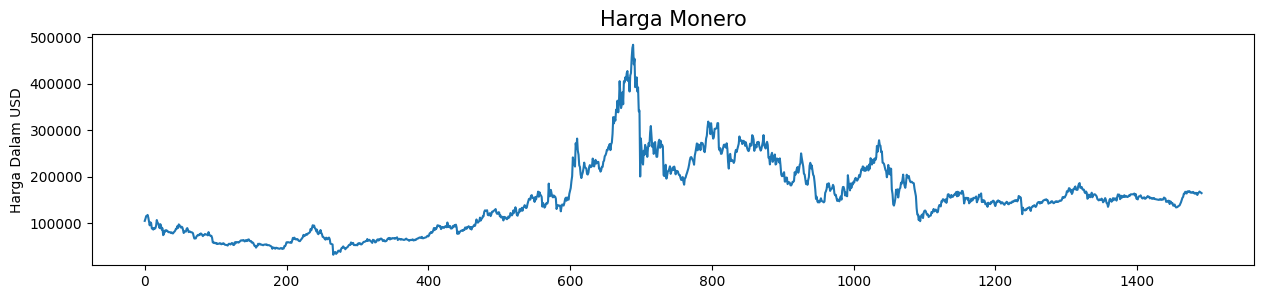


 Data baru  :



,Terakhir,Pembukaan,Tertinggi,Terendah
count,1492.000000,1492.000000,1492.000000,1492.000000
mean,151947.122654,151901.390080,157180.743968,146376.187668
std,76563.798855,76571.423373,80364.223237,72734.952210
min,32107.000000,32108.000000,37167.000000,25474.000000
25%,85980.500000,85997.750000,89199.250000,82542.750000
50%,148596.500000,148531.500000,151903.500000,144977.000000
75%,196808.250000,196903.750000,203649.250000,187643.000000
max,483687.000000,483687.000000,520164.000000,452469.000000


In [2]:
def preprocess_and_save(csv_file_path, required_columns, output_csv_file):
    dfa = pd.read_csv(csv_file_path)
    acleaned_df = dfa[required_columns]
    acleaned_df_reversed = acleaned_df[::-1]
    acleaned_df_reversed.to_csv('clean.csv', index=False, decimal='.')

    df = pd.read_csv(csv_file_path, thousands=',', decimal='.')
    cleaned_df = df[required_columns]  # Select only the desired columns
    cleaned_df_reversed = cleaned_df[::-1]  # Reverse the order of rows
    cleaned_df_reversed.to_csv(output_csv_file, index=False, decimal='.')

csv_file_path = 'xmr.csv'
required_columns = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']
output_csv_file = 'clean1.csv'

preprocess_and_save(csv_file_path, required_columns, output_csv_file)

df = pd.read_csv(csv_file_path)
df.head()
print("\nInformasi Missing Values:")
print(df.isnull().sum())
print("\n Total Data : ")
print(df.shape)
print("\n kolom yang digunakan :")
print(required_columns)
print(f"\n Data yang sudah dipreprocessing telah disimpan dalam file {output_csv_file}.")

newdata = 'clean1.csv'
dta = pd.read_csv(newdata)


print("\n Grafik Harga Dari Data baru  :\n")


plt.figure(figsize=(15,3))
plt.plot(dta['Terakhir'])
plt.title('Harga Monero', fontsize=15)
plt.ylabel('Harga Dalam USD')
plt.show()



print("\n Data baru  :\n")
dta.describe()

### Visualisasi Training Set Result


In [3]:
data = pd.read_csv('clean1.csv')
target_column = 'Terakhir'
feature_columns = ['Pembukaan','Tertinggi','Terendah']
y = data[target_column]
X = data[feature_columns]
print(X)
print(y)

      Pembukaan  Tertinggi  Terendah
0        100226     108297     99856
1        104977     110066    104955
2        109658     118800    108607
3        115218     121079    114240
4        115783     119784    112737
...         ...        ...       ...
1487     164700     166267    162962
1488     165459     168836    163036
1489     168109     168699    164203
1490     166892     170227    165274
1491     165734     168263    164175

[1492 rows x 3 columns]
0       104978
1       109550
2       115227
3       115783
4       117800
         ...  
1487    165493
1488    168109
1489    166924
1490    165810
1491    164657
Name: Terakhir, Length: 1492, dtype: int64


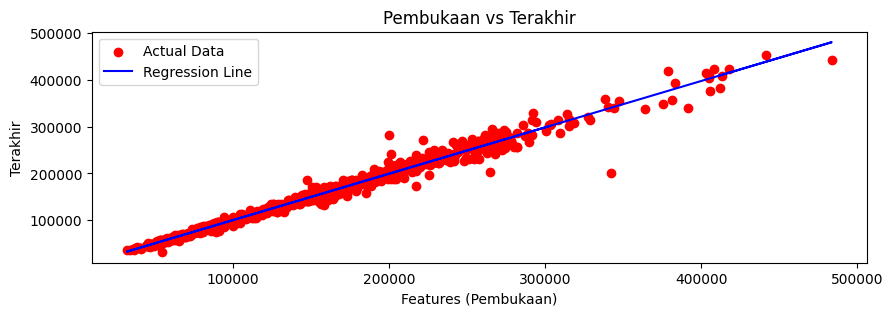

In [4]:
data = pd.read_csv('clean1.csv')
target_column = 'Terakhir'
feature_columns = ['Pembukaan']
y = data[target_column]
X = data[feature_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.figure(figsize=(10, 3))
plt.scatter(X_train, y_train, color='red', label='Actual Data')
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression Line')
plt.title('Pembukaan vs Terakhir')
plt.xlabel('Features (Pembukaan)')
plt.ylabel('Terakhir')
plt.legend()
plt.show()

In [5]:
def train_and_save_model(csv_file_path, target_column, feature_columns, model_file):
    df = pd.read_csv(csv_file_path)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.').astype(float)
    data = df[[target_column] + feature_columns]
    X = data[feature_columns]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    model_dict = {
        'coefficients': model.coef_.tolist(),
        'intercept': model.intercept_
    }
    with open(model_file, 'w') as json_file:
        json.dump(model_dict, json_file)
    return model, y_test, y_pred, mse, r_squared

csv_file_path = 'clean.csv'
target_column = 'Terakhir'
feature_columns = ['Pembukaan', 'Tertinggi', 'Terendah']
model_file = 'linear_regression_model.json'
model, y_test, y_pred, mse, r_squared = train_and_save_model(csv_file_path, target_column, feature_columns, model_file)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print(f"R-squared: {r_squared}")

Mean Absolute Error (MAE): 2.671515649904283
Mean Squared Error (MSE): 22.041478069660187
R-squared: 0.9958287771684554


### Uji Model

In [6]:
def str_to_float(s):
    return float(s.replace(",", ""))
def format_with_commas_and_decimal(num):
    formatted_num = "{:,.3f}".format(num)
    return formatted_num.rstrip("0").rstrip(".") if "." in formatted_num else formatted_num
def predict_price(data):
    return data[0] + 5
data_list = []
with open('clean.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        data_list.append([str_to_float(row[0]), str_to_float(row[1]), str_to_float(row[2]), str_to_float(row[3])])
predicted_prices = [predict_price(data) for data in data_list]
with open('predicted_prices.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Harga Asli', 'Hasil Prediksi'])
    for data, predicted_price in zip(data_list, predicted_prices):
        formatted_predicted_price = format_with_commas_and_decimal(predicted_price)
        writer.writerow([format_with_commas_and_decimal(data[0]),
                         formatted_predicted_price])
hasil1 = pd.read_csv('predicted_prices.csv')
hasil1.head(11)

,Harga Asli,Hasil Prediksi
0,"104,978","104,983"
1,"109,550","109,555"
2,"115,227","115,232"
3,"115,783","115,788"
4,"117,800","117,805"
5,"112,319","112,324"
6,"104,454","104,459"
7,"95,359","95,364"
8,"101,926","101,931"
9,"100,010","100,015"
